<a href="https://colab.research.google.com/github/pankajroy97/Web-Scraping-using-Python/blob/main/IMDB_Movie_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup  #import library
import requests                #request library

In [2]:
url='https://www.imdb.com/chart/top/'

In [3]:
response=requests.get(url)
print(response)  #valid response
#if response is 200,then it is valid response

<Response [200]>


In [4]:
bs=BeautifulSoup(response.content,'html')
bs

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 250 Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/chart/top/" rel="canonical"/>
<meta content="http://www.imdb.com/chart/top/" property="og:url"/>
<script>
    if (typeof uet == 'function') {
      uet("bb", "Loa

In [5]:
#find(tag,attribute)
r1=bs.find('td',attrs={'class':"titleColumn"})
print(r1)

<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>


In [6]:
r1.text.strip()[:1]

'1'

In [7]:
print(r1.a)
print(r1.text)
print(r1.a.text)
print(r1.a.get('title'))

print(r1.span.text[1:5])

<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>

      1.
      The Shawshank Redemption
(1994)

The Shawshank Redemption
Frank Darabont (dir.), Tim Robbins, Morgan Freeman
1994


In [8]:
r2=bs.find('td',attrs={'class':"ratingColumn imdbRating"})
print(r2)

<td class="ratingColumn imdbRating">
<strong title="9.2 based on 2,754,830 user ratings">9.2</strong>
</td>


In [9]:
print(r2.strong.get('title'))
print(r2.strong.text)
print(r2.strong.get('title')[13:22])

9.2 based on 2,754,830 user ratings
9.2
2,754,830


In [10]:
movie_name=[]
member=[]
year=[]
rank=[]
for i in bs.findAll('td',attrs={'class':"titleColumn"}):
  movie_name.append(i.a.text)
  member.append(i.a.get('title'))
  year.append(i.span.text[1:5])
  rank.append(i.text.strip()[:3])

In [11]:
print(len(movie_name))
print(len(member))
print(len(year))
print(len(rank))

250
250
250
250


In [12]:
print(movie_name)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', 'De 12 gezworenen', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Spider-Man: Across the Spider-Verse', 'Forrest Gump', 'Fight Club', 'The Lord of the Rings: The Two Towers', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', "One Flew Over the Cuckoo's Nest", 'Seven', "It's a Wonderful Life", 'Shichinin no samurai', 'The Silence of the Lambs', 'Saving Private Ryan', 'Cidade de Deus', 'Interstellar', 'Het leven is mooi', 'The Green Mile', 'Star Wars: Episode IV: A New Hope', 'Terminator 2: Judgment Day', 'Back to the Future', 'Spirited Away: De reis van Chihiro', 'The Pianist', 'Psycho', 'Gisaengchung', 'Léon', 'The Lion King', 'Gladiator', 'American History X', 'The Departed', 'Whiplash', 'The Prestige', 'The Usual Suspects', 'Casab

In [13]:
print(member)

['Frank Darabont (dir.), Tim Robbins, Morgan Freeman', 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino', 'Christopher Nolan (dir.), Christian Bale, Heath Ledger', 'Francis Ford Coppola (dir.), Al Pacino, Robert De Niro', 'Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb', 'Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes', 'Peter Jackson (dir.), Elijah Wood, Viggo Mortensen', 'Quentin Tarantino (dir.), John Travolta, Uma Thurman', 'Peter Jackson (dir.), Elijah Wood, Ian McKellen', 'Sergio Leone (dir.), Clint Eastwood, Eli Wallach', 'Joaquim Dos Santos (dir.), Shameik Moore, Hailee Steinfeld', 'Robert Zemeckis (dir.), Tom Hanks, Robin Wright', 'David Fincher (dir.), Brad Pitt, Edward Norton', 'Peter Jackson (dir.), Elijah Wood, Ian McKellen', 'Christopher Nolan (dir.), Leonardo DiCaprio, Joseph Gordon-Levitt', 'Irvin Kershner (dir.), Mark Hamill, Harrison Ford', 'Lana Wachowski (dir.), Keanu Reeves, Laurence Fishburne', 'Martin Scorsese (dir.), Robert De Niro, Ray Liotta', 'Milos

In [14]:
print(year)
type(year)

['1994', '1972', '2008', '1974', '1957', '1993', '2003', '1994', '2001', '1966', '2023', '1994', '1999', '2002', '2010', '1980', '1999', '1990', '1975', '1995', '1946', '1954', '1991', '1998', '2002', '2014', '1997', '1999', '1977', '1991', '1985', '2001', '2002', '1960', '2019', '1994', '1994', '2000', '1998', '2006', '2014', '2006', '1995', '1942', '1988', '1962', '2011', '1936', '1968', '1988', '1954', '1979', '1931', '1979', '2000', '2012', '1981', '2008', '2006', '1950', '1957', '2018', '1980', '1940', '1957', '2018', '1986', '1999', '2012', '1964', '2009', '2003', '2017', '1984', '1995', '1995', '1981', '2019', '2019', '1997', '1997', '1984', '2016', '2009', '1952', '1963', '2000', '2018', '2010', '1983', '1985', '2004', '1968', '2012', '1992', '1962', '1941', '1952', '1931', '1959', '1960', '1958', '2001', '1944', '1971', '1987', '2020', '1983', '2010', '1995', '2009', '1962', '1973', '2011', '1927', '1988', '1997', '1989', '2000', '1948', '1976', '2007', '2019', '2016', '2004',

list

In [15]:
print(rank)

['1.\n', '2.\n', '3.\n', '4.\n', '5.\n', '6.\n', '7.\n', '8.\n', '9.\n', '10.', '11.', '12.', '13.', '14.', '15.', '16.', '17.', '18.', '19.', '20.', '21.', '22.', '23.', '24.', '25.', '26.', '27.', '28.', '29.', '30.', '31.', '32.', '33.', '34.', '35.', '36.', '37.', '38.', '39.', '40.', '41.', '42.', '43.', '44.', '45.', '46.', '47.', '48.', '49.', '50.', '51.', '52.', '53.', '54.', '55.', '56.', '57.', '58.', '59.', '60.', '61.', '62.', '63.', '64.', '65.', '66.', '67.', '68.', '69.', '70.', '71.', '72.', '73.', '74.', '75.', '76.', '77.', '78.', '79.', '80.', '81.', '82.', '83.', '84.', '85.', '86.', '87.', '88.', '89.', '90.', '91.', '92.', '93.', '94.', '95.', '96.', '97.', '98.', '99.', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '14

In [16]:
rank=[i.replace('.\n','')for i in rank]
rank=[i.replace('.','')for i in rank]
print(rank)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [17]:
rating=[]
users=[]
for i in bs.findAll('td',attrs={'class':"ratingColumn imdbRating"}):
  rating.append(i.strong.text)
  users.append(i.strong.get('title')[13:22])

In [18]:
print(len(rating))
print(len(users))

250
250


In [19]:
users

['2,754,830',
 '1,916,705',
 '2,727,686',
 '1,304,938',
 '816,092 u',
 '1,388,747',
 '1,892,203',
 '2,115,684',
 '1,920,722',
 '779,319 u',
 '140,724 u',
 '2,142,909',
 '2,193,507',
 '1,707,718',
 '2,420,815',
 '1,324,863',
 '1,963,543',
 '1,195,655',
 '1,031,130',
 '1,703,280',
 '473,260 u',
 '353,673 u',
 '1,471,695',
 '1,427,413',
 '772,667 u',
 '1,921,169',
 '712,912 u',
 '1,339,469',
 '1,397,115',
 '1,126,395',
 '1,243,141',
 '793,341 u',
 '859,008 u',
 '689,505 u',
 '860,215 u',
 '1,192,708',
 '1,088,947',
 '1,540,251',
 '1,145,677',
 '1,360,162',
 '909,212 u',
 '1,368,374',
 '1,106,685',
 '584,922 u',
 '288,583 u',
 '61,390 us',
 '884,089 u',
 '248,968 u',
 '337,858 u',
 '269,226 u',
 '503,047 u',
 '905,848 u',
 '188,968 u',
 '683,748 u',
 '1,266,684',
 '1,604,875',
 '991,476 u',
 '1,146,813',
 '397,372 u',
 '227,502 u',
 '202,713 u',
 '1,129,425',
 '1,052,369',
 '229,240 u',
 '129,950 u',
 '592,925 u',
 '734,208 u',
 '1,175,523',
 '1,746,607',
 '501,383 u',
 '1,496,798',
 '598,

In [20]:
users=[i.replace(' us','')for i in users]
users=[i.replace(' u','')for i in users]
users=[i.replace(',','')for i in users]

In [21]:
print(users)

['2754830', '1916705', '2727686', '1304938', '816092', '1388747', '1892203', '2115684', '1920722', '779319', '140724', '2142909', '2193507', '1707718', '2420815', '1324863', '1963543', '1195655', '1031130', '1703280', '473260', '353673', '1471695', '1427413', '772667', '1921169', '712912', '1339469', '1397115', '1126395', '1243141', '793341', '859008', '689505', '860215', '1192708', '1088947', '1540251', '1145677', '1360162', '909212', '1368374', '1106685', '584922', '288583', '61390', '884089', '248968', '337858', '269226', '503047', '905848', '188968', '683748', '1266684', '1604875', '991476', '1146813', '397372', '227502', '202713', '1129425', '1052369', '229240', '129950', '592925', '734208', '1175523', '1746607', '501383', '1496798', '598274', '538017', '410654', '1021608', '1057706', '256125', '1361729', '1186460', '408158', '1006970', '361326', '288885', '411967', '249600', '48060', '863608', '95767', '857644', '1080355', '86591', '1033708', '687417', '342685', '1045559', '30192

In [22]:
import pandas as pd

In [23]:
top250=pd.DataFrame({'Movie Name':movie_name,'Cast':member,'Year':year,'Rank':rank,'Rating':rating,'Users':users})
top250.head()

,Movie Name,Cast,Year,Rank,Rating,Users
0,The Shawshank Redemption,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",1994,1,9.2,2754830
1,The Godfather,"Francis Ford Coppola (dir.), Marlon Brando, Al...",1972,2,9.2,1916705
2,The Dark Knight,"Christopher Nolan (dir.), Christian Bale, Heat...",2008,3,9.0,2727686
3,The Godfather Part II,"Francis Ford Coppola (dir.), Al Pacino, Robert...",1974,4,9.0,1304938
4,De 12 gezworenen,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",1957,5,9.0,816092


In [24]:
top250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie Name  250 non-null    object
 1   Cast        250 non-null    object
 2   Year        250 non-null    object
 3   Rank        250 non-null    object
 4   Rating      250 non-null    object
 5   Users       250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [25]:
top250['Rank']=top250['Rank'].astype(int)
top250['Rating']=top250['Rating'].astype(float)
top250['Users']=top250['Users'].astype(int)
top250['Year']=top250['Year'].astype(int)

In [26]:
top250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie Name  250 non-null    object 
 1   Cast        250 non-null    object 
 2   Year        250 non-null    int64  
 3   Rank        250 non-null    int64  
 4   Rating      250 non-null    float64
 5   Users       250 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 11.8+ KB


In [27]:
top250.isnull().sum()

Movie Name    0
Cast          0
Year          0
Rank          0
Rating        0
Users         0
dtype: int64

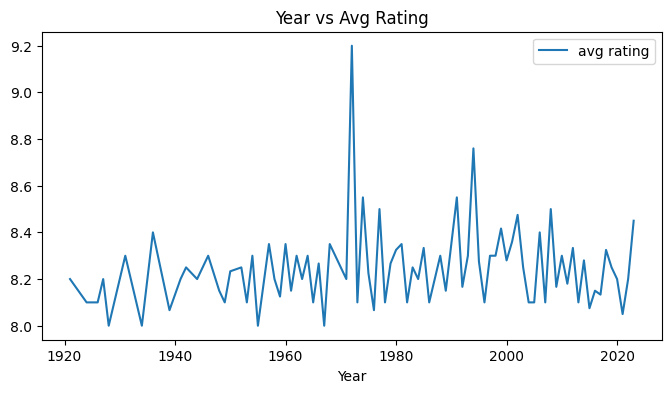

In [44]:
import matplotlib.pyplot as plt

x=top250.groupby('Year')['Rating'].mean()
plt.figure(figsize=(8,4))
x.plot(kind='line',label='avg rating')
plt.title('Year vs Avg Rating')
plt.legend()

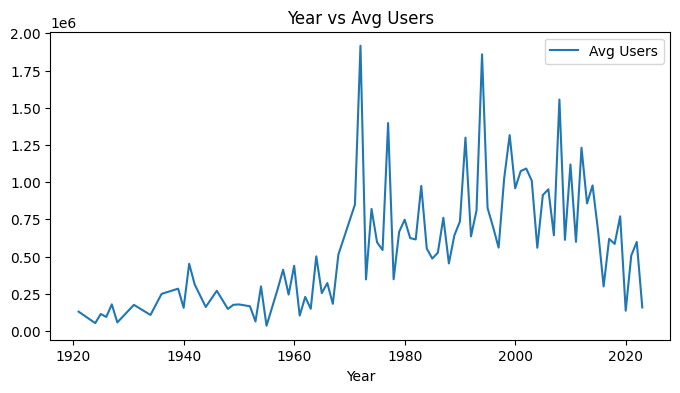

In [45]:
x=top250.groupby('Year')['Users'].mean()
plt.figure(figsize=(8,4))
x.plot(kind='line',label='Avg Users')
plt.title('Year vs Avg Users')
plt.legend()